In [1]:
#Is important to expand the display capacity to 95%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# High-resolution plot output for Retina notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
#Import the libraries
import pandas as pd  
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [4]:
#Read sample data
df = pd.read_csv("sample_data_forecast.csv")

In [5]:
#Explore the data
df.info()
df.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 2 columns):
week        192 non-null object
adoption    192 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


,week,adoption
182,3/26/18,576
183,4/2/18,602
184,4/9/18,690
185,4/16/18,668
186,4/23/18,674
187,4/30/18,572
188,5/7/18,635
189,5/14/18,593
190,5/21/18,630
191,5/28/18,572


In [6]:
#Make a mirror to avoid import again the data
df_test = df.copy()

In [7]:
#In case you need, you could drop and incomplete week (normally is the last)
df_test = df.drop(df_test.index[-1])

In [8]:
#In case you need,you could convert a Pandas Column to DateTime
#It is noteworthy, that in order to parse through a 2-digit year, e.g. '18' rather than '2018', a %y is required instead of a %Y.
df_test['week'] = pd.to_datetime(df_test['week'],format='%m/%d/%y')

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 2 columns):
week        191 non-null datetime64[ns]
adoption    191 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.5 KB


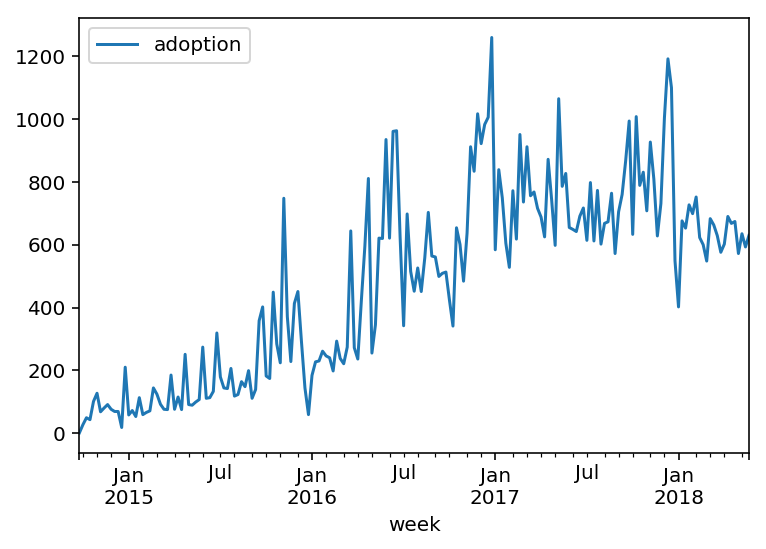

In [10]:
#Plotting the data set
df_test.plot(x ='week',y = 'adoption')

In [11]:
#Renaming columns to fit the model ds for date and y for values
df_test.columns = ['ds','y']

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


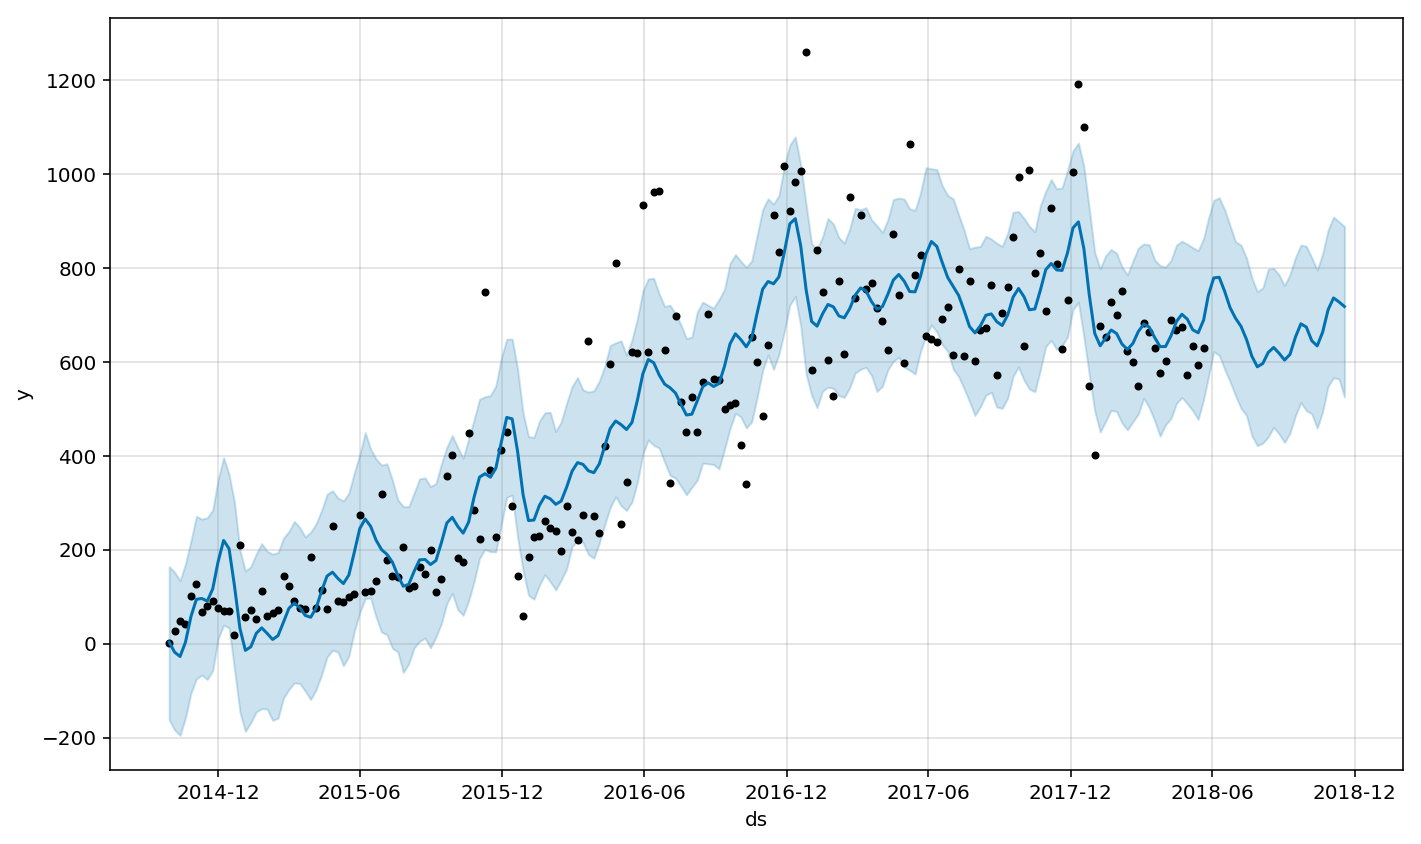

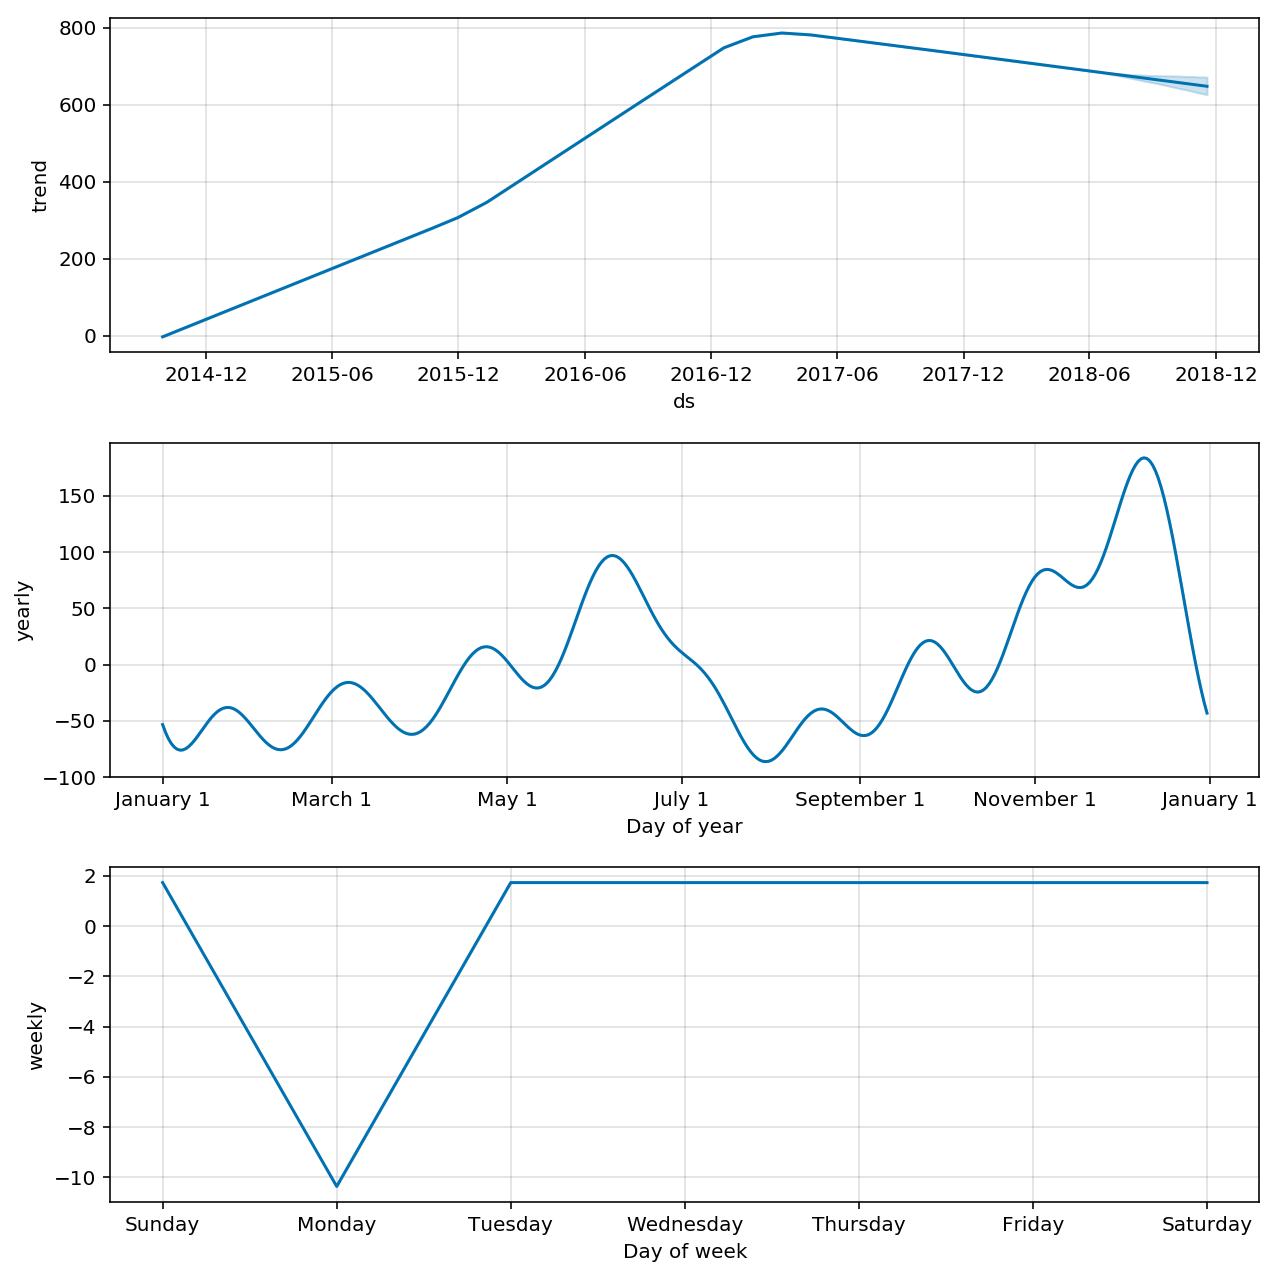

In [13]:
#model
#First step is Adjust the trend flexibility,By default, this parameter is set to 0.05. Increasing it will make the trend more flexible:
m = Prophet(changepoint_prior_scale=0.25, weekly_seasonality = True)
m.fit(df_test)
#Let's start predicting 26 weeks ahead 
future = m.make_future_dataframe(periods=26,freq='w')
forecast = m.predict(future)
#plot the forecast
m.plot(forecast)
#keep our predicted values in results
m.plot_components(forecast)
results = forecast[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail(25)

#export our results without index
results.to_csv('results_projection.csv',index=False)